#### Import the necessary libraries.

In [1]:
import pandas                             as      pd
import numpy                              as      np
import matplotlib.pyplot                  as      plt
import seaborn                            as      sns
from   IPython.display                    import  display
from   pylab                              import  rcParams 
from   datetime                           import  datetime, timedelta
from statsmodels.tsa.stattools            import  adfuller
from statsmodels.tsa.stattools            import  pacf
from statsmodels.tsa.stattools            import  acf
from statsmodels.graphics.tsaplots        import  plot_pacf
from statsmodels.graphics.tsaplots        import  plot_acf
from statsmodels.graphics.gofplots        import  qqplot
from statsmodels.tsa.seasonal             import  seasonal_decompose
from statsmodels.tsa.arima_model          import  ARIMA
from statsmodels.tsa.statespace.sarimax   import  SARIMAX
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

#### Read the data set in a Time Series with proper Time frequency or period.

In [2]:
df = pd.read_csv('MaunaLoa.csv',parse_dates=['Year-Month'],index_col='Year-Month')
df.head(15)

,CO2 ppm
Year-Month,
1965-01-01,319.32
1965-02-01,320.36
1965-03-01,320.82
1965-04-01,322.06
1965-05-01,322.17
1965-06-01,321.95
1965-07-01,321.20
1965-08-01,318.81
1965-09-01,317.82


In [3]:
df.tail()

,CO2 ppm
Year-Month,
1980-08-01,337.19
1980-09-01,335.49
1980-10-01,336.63
1980-11-01,337.74
1980-12-01,338.36


# Plot the Time Series Data.

In [4]:
from pylab import rcParams
rcParams['figure.figsize'] = 15,8

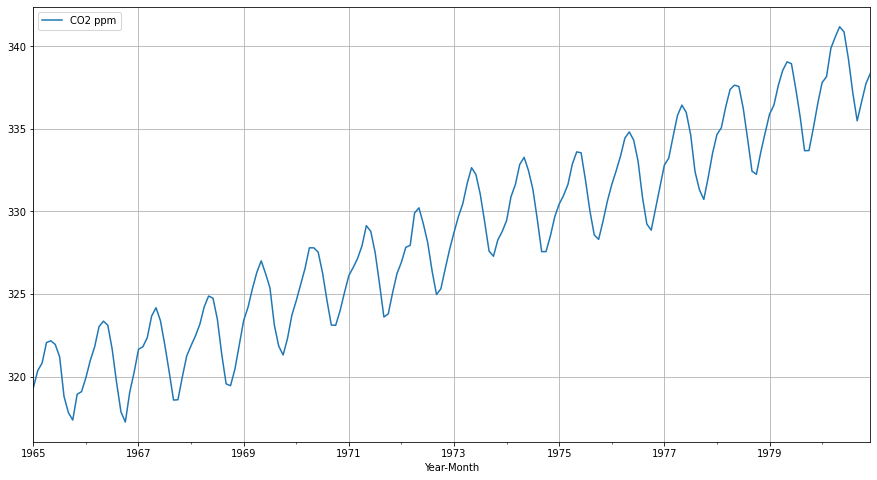

In [5]:
df.plot();
plt.grid()

# Plot a boxplot to understand the variation of Carbon Dioxide in parts per million with respect to months across years.

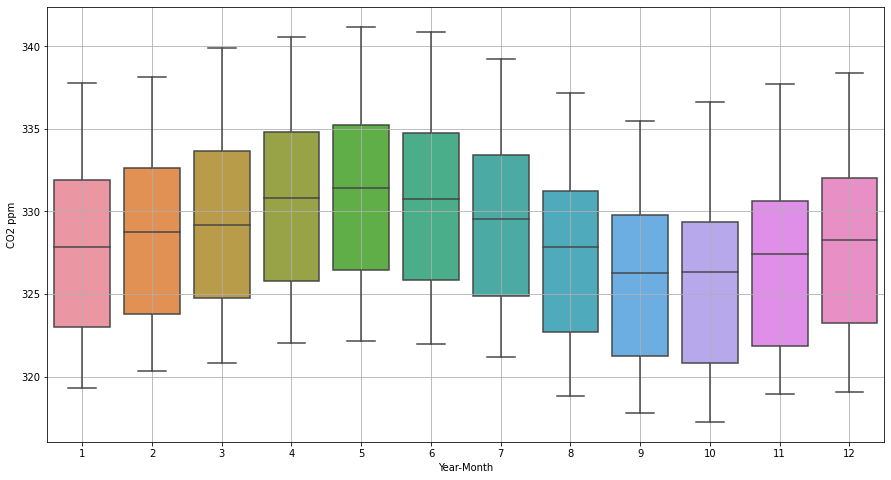

In [6]:
sns.boxplot(x=df.index.month,y=df['CO2 ppm'])
plt.grid();

# Plot a graph of monthly Carbon Dioxide in parts per million across years.

In [7]:
monthly_co2ppm_across_years = pd.pivot_table(df, values = 'CO2 ppm', columns = df.index.year, index = df.index.month_name())
monthly_co2ppm_across_years

Year-Month,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980
Year-Month,,,,,,,,,,,,,,,,
April,322.06,323.03,323.67,324.23,326.31,327.80,327.92,329.91,331.69,332.85,332.87,334.45,335.82,337.39,338.54,340.57
August,318.81,319.64,320.29,321.34,323.12,324.63,325.62,326.39,329.36,329.53,330.05,330.87,332.41,334.39,335.71,337.19
December,319.09,320.26,321.25,321.92,323.72,325.09,326.25,327.71,328.79,329.69,330.63,331.50,333.53,334.76,336.53,338.36
February,320.36,320.98,321.81,322.47,324.21,325.57,326.61,327.83,329.69,330.89,330.97,332.46,333.23,335.07,336.44,338.16
January,319.32,319.94,321.65,321.88,323.40,324.60,326.12,326.93,328.73,329.45,330.45,331.63,332.81,334.66,335.89,337.81
July,321.20,321.65,321.93,323.47,325.37,326.28,327.52,328.11,331.03,331.34,331.90,333.05,334.65,336.25,337.41,339.25
June,321.95,323.11,323.39,324.75,326.24,327.54,328.80,329.25,332.24,332.47,333.55,334.32,335.99,337.57,338.95,340.87
March,320.82,321.81,322.36,323.17,325.33,326.55,327.16,327.95,330.47,331.63,331.64,333.36,334.55,336.33,337.63,339.88
May,322.17,323.36,324.17,324.88,327.01,327.80,329.14,330.22,332.65,333.28,333.61,334.82,336.44,337.65,339.06,341.19


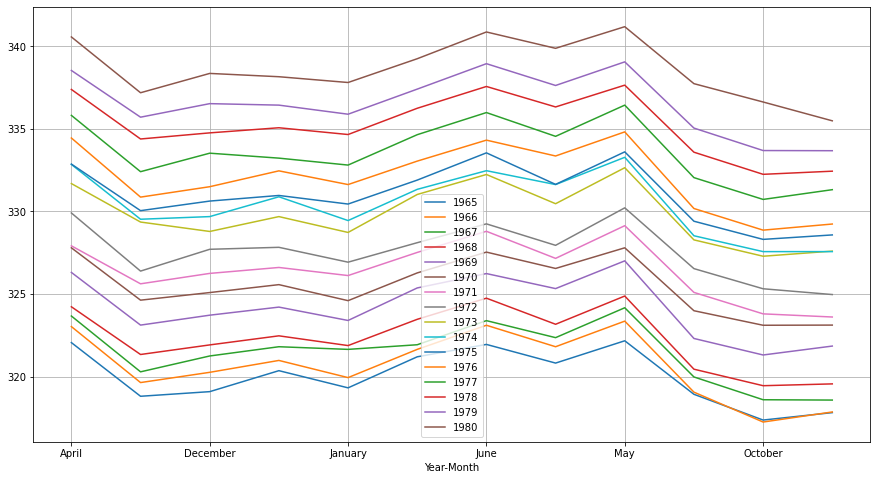

In [8]:
monthly_co2ppm_across_years.plot()
plt.grid()
plt.legend(loc='best');

# Decompose the Time Series to understand the various components.

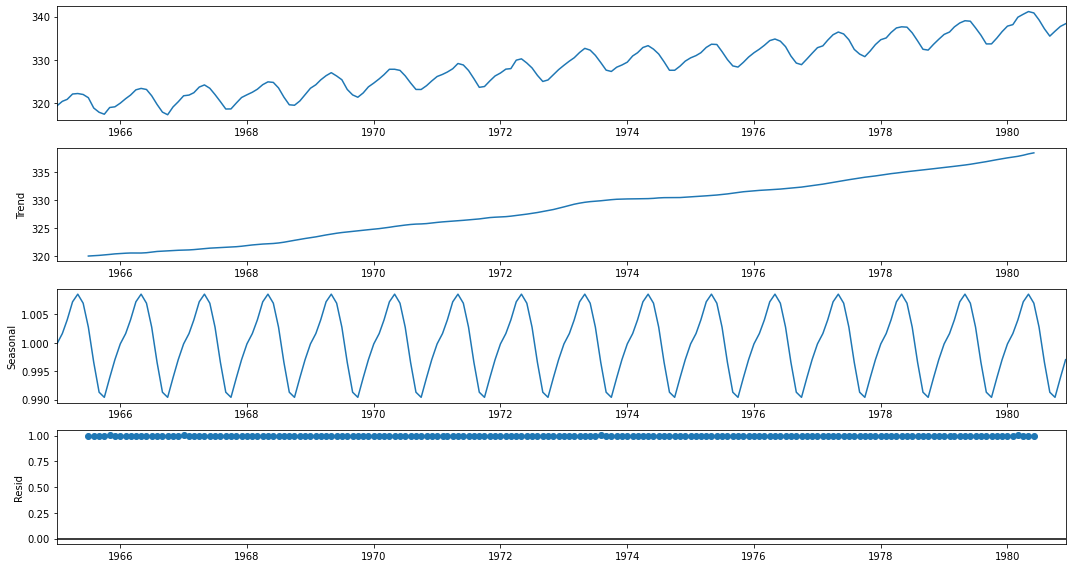

In [9]:
decomposition = seasonal_decompose(df,model='multiplicative')
decomposition.plot();

## stationarity test

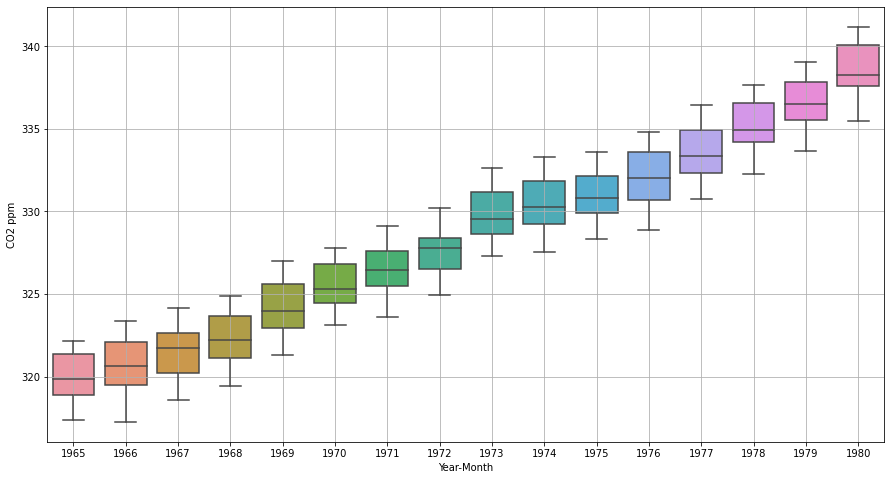

In [10]:
sns.boxplot(x=df.index.year,y=df['CO2 ppm'])
plt.grid();

In [11]:
observations= df.values
test_result = adfuller(observations)

In [12]:
test_result

(1.2696771490032224,
 0.9964336403294772,
 12,
 179,
 {'1%': -3.4674201432469816,
  '5%': -2.877826051844538,
  '10%': -2.575452082332012},
 144.00145013189143)

## applying differencing

In [13]:
df_diff = df.diff(periods=1).dropna()
observations= df_diff.values
test_result = adfuller(observations)
test_result

(-4.750106971676851,
 6.768699865173864e-05,
 11,
 179,
 {'1%': -3.4674201432469816,
  '5%': -2.877826051844538,
  '10%': -2.575452082332012},
 144.25602170016555)

<AxesSubplot:xlabel='Year-Month'>

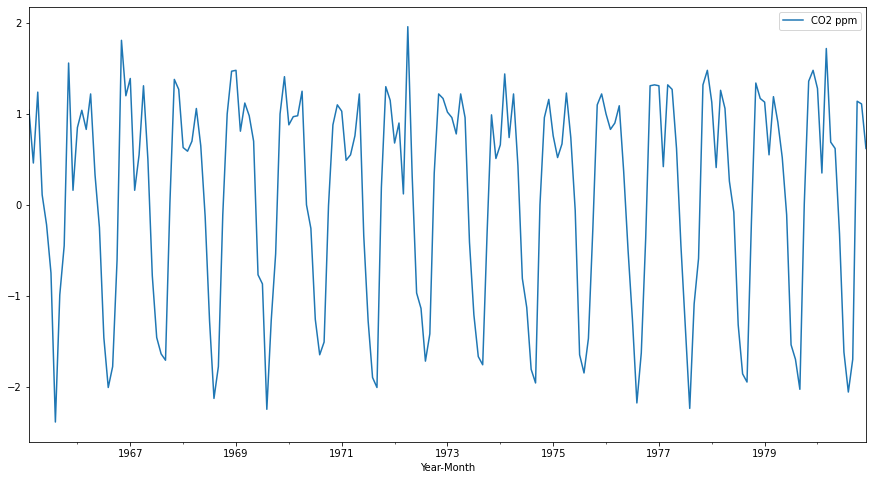

In [14]:
df_diff.plot()

In [15]:
df_diff1=df_diff.diff(periods=12).dropna()

<AxesSubplot:xlabel='Year-Month'>

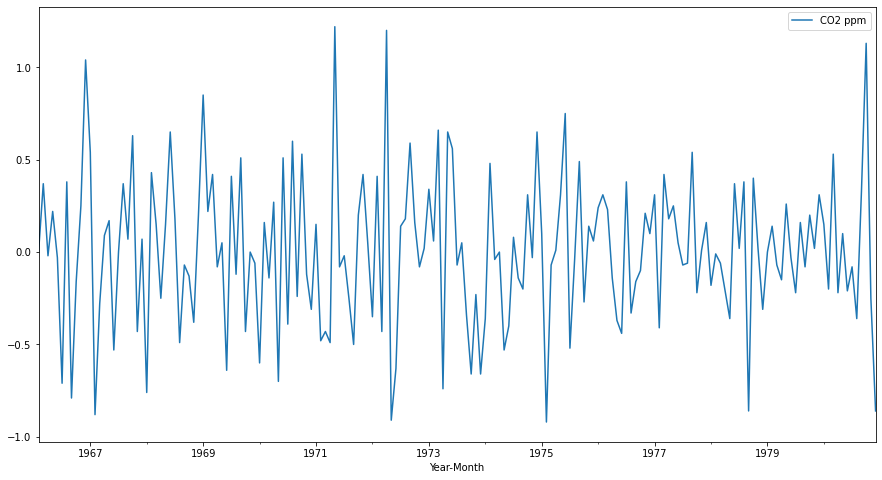

In [16]:
df_diff1.plot()

In [17]:
df_diff2=df.diff(periods=12).dropna()

<AxesSubplot:xlabel='Year-Month'>

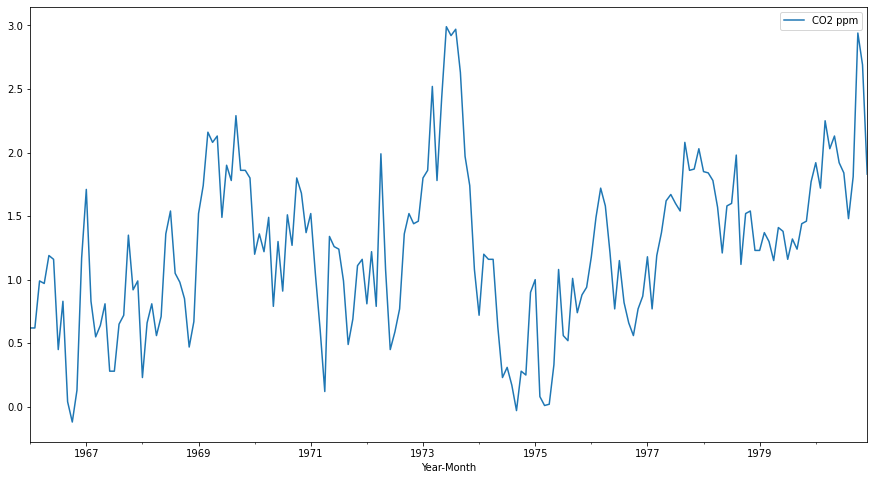

In [18]:
df_diff2.plot()

In [19]:
# will use d=1 for ARIMA model building

# Check the ACF and PACF of the training data.

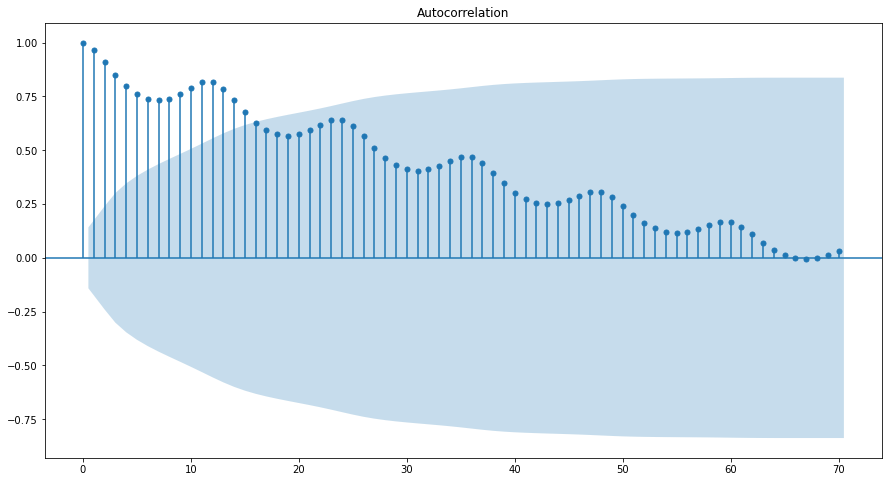

In [20]:
plot_acf(df,lags=70);

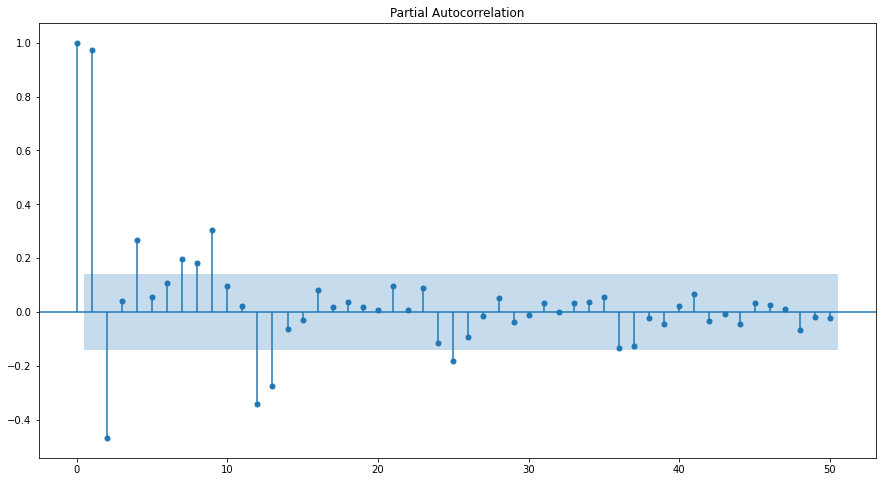

In [21]:
plot_pacf(df,lags=50);

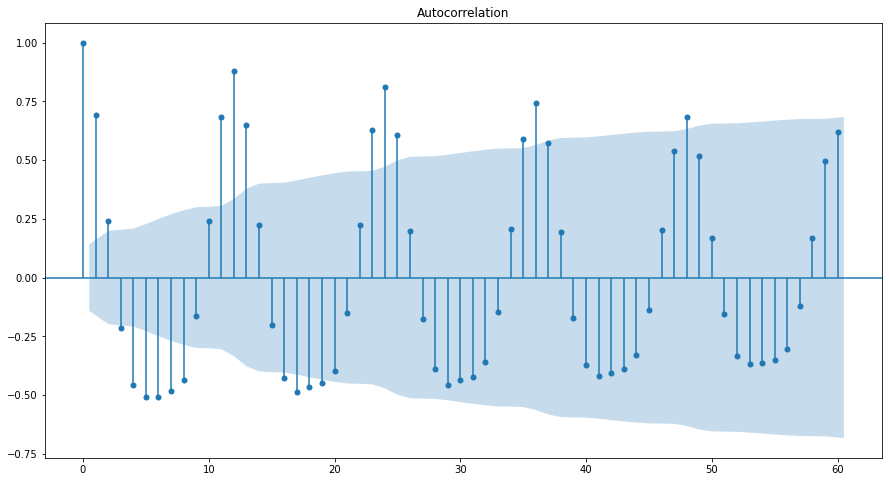

In [22]:
plot_acf(df_diff,lags=60);

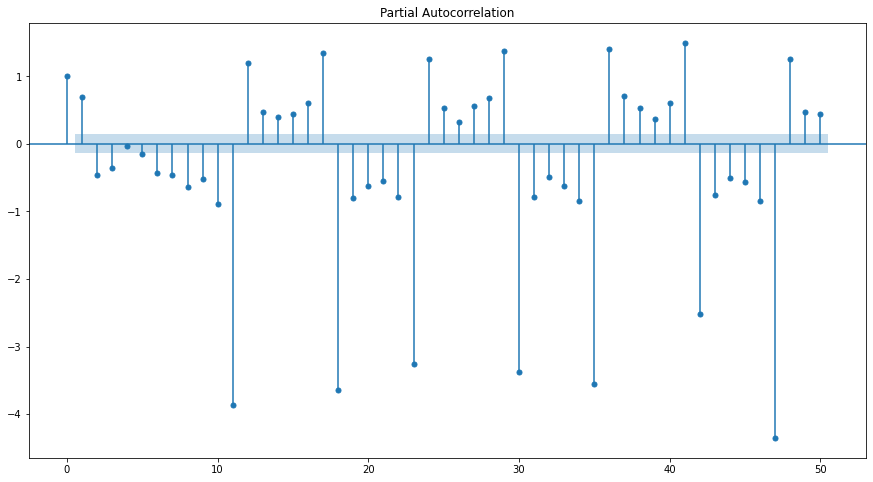

In [23]:
plot_pacf(df_diff,lags=50);

In [24]:
# proposing that try for combinations p,q=1,2,3,4    dont go beyond 4

## Train-Test split

In [25]:
train_end=datetime(1978,12,1)
test_end=datetime(1980,12,1)

In [26]:
train             = df[:train_end] 
test              = df[train_end + timedelta(days=1):test_end]

In [27]:
print(train)
print(test)

            CO2 ppm
Year-Month         
1965-01-01   319.32
1965-02-01   320.36
1965-03-01   320.82
1965-04-01   322.06
1965-05-01   322.17
...             ...
1978-08-01   334.39
1978-09-01   332.44
1978-10-01   332.25
1978-11-01   333.59
1978-12-01   334.76

[168 rows x 1 columns]
            CO2 ppm
Year-Month         
1979-01-01   335.89
1979-02-01   336.44
1979-03-01   337.63
1979-04-01   338.54
1979-05-01   339.06
1979-06-01   338.95
1979-07-01   337.41
1979-08-01   335.71
1979-09-01   333.68
1979-10-01   333.69
1979-11-01   335.05
1979-12-01   336.53
1980-01-01   337.81
1980-02-01   338.16
1980-03-01   339.88
1980-04-01   340.57
1980-05-01   341.19
1980-06-01   340.87
1980-07-01   339.25
1980-08-01   337.19
1980-09-01   335.49
1980-10-01   336.63
1980-11-01   337.74
1980-12-01   338.36


## Selecting an order of ARIMA model for data with the lowest Akaike Information Criteria (AIC). 

In [28]:
import itertools
p = q = range(0, 4)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('parameter combinations for the Model')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

parameter combinations for the Model
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (0, 1, 3)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (1, 1, 3)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)
Model: (2, 1, 3)
Model: (3, 1, 0)
Model: (3, 1, 1)
Model: (3, 1, 2)
Model: (3, 1, 3)


In [29]:
pdq

[(0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (3, 1, 0),
 (3, 1, 1),
 (3, 1, 2),
 (3, 1, 3)]

In [30]:
dfObj1 = pd.DataFrame(columns=['param', 'AIC'])
dfObj1

,param,AIC


In [31]:
for param in pdq:
            try:
                mod = ARIMA(train, order=param)
                results_Arima = mod.fit()
                print('ARIMA{} - AIC:{}'.format(param, results_Arima.aic))
                dfObj1 = dfObj1.append({'param':param, 'AIC': results_Arima.aic}, ignore_index=True)

            except:
                continue

ARIMA(0, 1, 0) - AIC:522.5977077720062
ARIMA(0, 1, 1) - AIC:428.3957418175768
ARIMA(0, 1, 2) - AIC:388.16876368785
ARIMA(0, 1, 3) - AIC:371.7863112200259
ARIMA(1, 1, 0) - AIC:413.8212307919505
ARIMA(1, 1, 1) - AIC:395.8683364321431
ARIMA(2, 1, 0) - AIC:374.6834273171294
ARIMA(2, 1, 2) - AIC:307.67028253111687
ARIMA(2, 1, 3) - AIC:276.3819168417251
ARIMA(3, 1, 0) - AIC:356.99657205196854
ARIMA(3, 1, 2) - AIC:309.64356227895854
ARIMA(3, 1, 3) - AIC:277.6970444392672


In [32]:
dfObj1.sort_values(by=['AIC'])

,param,AIC
8,"(2, 1, 3)",276.381917
11,"(3, 1, 3)",277.697044
7,"(2, 1, 2)",307.670283
10,"(3, 1, 2)",309.643562
9,"(3, 1, 0)",356.996572
3,"(0, 1, 3)",371.786311
6,"(2, 1, 0)",374.683427
2,"(0, 1, 2)",388.168764
5,"(1, 1, 1)",395.868336
4,"(1, 1, 0)",413.821231


In [33]:
model = ARIMA(train,order=(2,1,3))

results_Arima = model.fit()

print(results_Arima.summary())

                             ARIMA Model Results                              
Dep. Variable:              D.CO2 ppm   No. Observations:                  167
Model:                 ARIMA(2, 1, 3)   Log Likelihood                -131.191
Method:                       css-mle   S.D. of innovations              0.513
Date:                Fri, 24 Sep 2021   AIC                            276.382
Time:                        12:14:58   BIC                            298.208
Sample:                    02-01-1965   HQIC                           285.241
                         - 12-01-1978                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0963      0.021      4.608      0.000       0.055       0.137
ar.L1.D.CO2 ppm     1.7040      0.016    106.620      0.000       1.673       1.735
ar.L2.D.CO2 ppm    -0.9712      

# Predict on the Test Set using this model and evaluate the model on the test set using RMSE and MAPE

In [34]:
pred_start=test.index[0]
pred_end=test.index[-1]

In [35]:
ARIMA_predictions=results_Arima.predict(start=pred_start, end=pred_end)

In [36]:
ARIMA_forecast=results_Arima.forecast(24,alpha=0.05)

In [37]:
ARIMA_forecast

(array([336.08157298, 337.37427418, 338.2331961 , 338.46709202,
        338.05720673, 337.15732157, 336.04770222, 335.05657997,
        334.47107848, 334.4616875 , 335.04007138, 336.06052508,
        337.26343198, 338.34790399, 339.05335686, 339.22796918,
        338.86611289, 338.10564827, 337.18696155, 336.38579031,
        335.93853799, 335.98024721, 336.51143893, 337.40184591]),
 array([0.51340879, 0.79681322, 0.89918145, 0.91912264, 0.91915734,
        0.92779895, 0.93761468, 0.93829317, 0.94910286, 1.01167036,
        1.14225155, 1.30726038, 1.45573713, 1.5548306 , 1.60080389,
        1.61213317, 1.612366  , 1.61373247, 1.61514536, 1.61528976,
        1.62470004, 1.66171524, 1.73443595, 1.82894338]),
 array([[335.07531023, 337.08783572],
        [335.81254897, 338.93599939],
        [336.47083285, 339.99555935],
        [336.66564475, 340.2685393 ],
        [336.25569146, 339.85872201],
        [335.33886904, 338.9757741 ],
        [334.21001123, 337.88539322],
        [333.21755

In [38]:
test

,CO2 ppm
Year-Month,
1979-01-01,335.89
1979-02-01,336.44
1979-03-01,337.63
1979-04-01,338.54
1979-05-01,339.06
1979-06-01,338.95
1979-07-01,337.41
1979-08-01,335.71
1979-09-01,333.68


In [39]:
ARIMA_predictions

1979-01-01    1.321573
1979-02-01    1.292701
1979-03-01    0.858922
1979-04-01    0.233896
1979-05-01   -0.409885
1979-06-01   -0.899885
1979-07-01   -1.109619
1979-08-01   -0.991122
1979-09-01   -0.585501
1979-10-01   -0.009391
1979-11-01    0.578384
1979-12-01    1.020454
1980-01-01    1.202907
1980-02-01    1.084472
1980-03-01    0.705453
1980-04-01    0.174612
1980-05-01   -0.361856
1980-06-01   -0.760465
1980-07-01   -0.918687
1980-08-01   -0.801171
1980-09-01   -0.447252
1980-10-01    0.041709
1980-11-01    0.531192
1980-12-01    0.890407
Freq: MS, dtype: float64

In [40]:
ARIMA_pred=ARIMA_predictions.cumsum()
ARIMA_pred

1979-01-01    1.321573
1979-02-01    2.614274
1979-03-01    3.473196
1979-04-01    3.707092
1979-05-01    3.297207
1979-06-01    2.397322
1979-07-01    1.287702
1979-08-01    0.296580
1979-09-01   -0.288922
1979-10-01   -0.298313
1979-11-01    0.280071
1979-12-01    1.300525
1980-01-01    2.503432
1980-02-01    3.587904
1980-03-01    4.293357
1980-04-01    4.467969
1980-05-01    4.106113
1980-06-01    3.345648
1980-07-01    2.426962
1980-08-01    1.625790
1980-09-01    1.178538
1980-10-01    1.220247
1980-11-01    1.751439
1980-12-01    2.641846
Freq: MS, dtype: float64

In [41]:
ARIMA_pred=pd.DataFrame(ARIMA_pred,columns=train.columns)

In [42]:
ARIMA_pred

,CO2 ppm
1979-01-01,1.321573
1979-02-01,2.614274
1979-03-01,3.473196
1979-04-01,3.707092
1979-05-01,3.297207
1979-06-01,2.397322
1979-07-01,1.287702
1979-08-01,0.296580
1979-09-01,-0.288922
1979-10-01,-0.298313


In [43]:
predict_fc = ARIMA_pred.copy()
#columns = train.columns
#for col in columns:        
        #predict_fc[str(col)+'_forecast'] = train[col].iloc[-1] + predict_fc[str(col)]

In [44]:
predict_fc['CO2 ppm_forecast']=predict_fc['CO2 ppm']+train['CO2 ppm'].iloc[-1]

In [45]:
predict_fc.head()

,CO2 ppm,CO2 ppm_forecast
1979-01-01,1.321573,336.081573
1979-02-01,2.614274,337.374274
1979-03-01,3.473196,338.233196
1979-04-01,3.707092,338.467092
1979-05-01,3.297207,338.057207


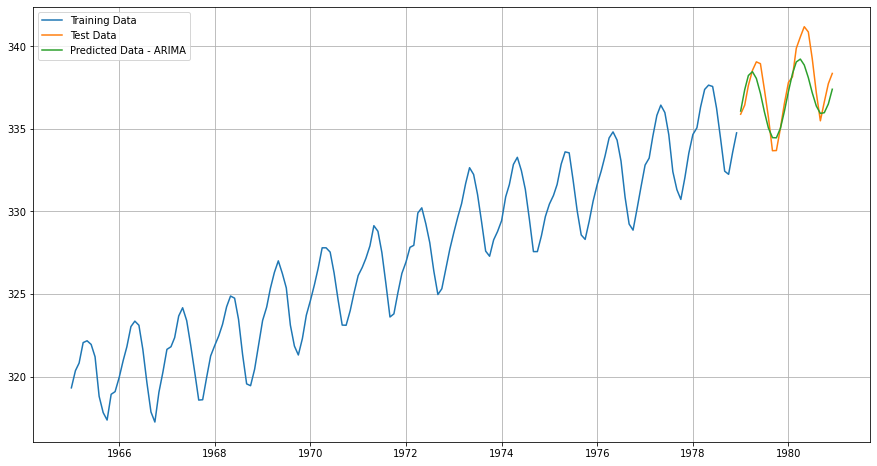

In [46]:
plt.plot(train,label='Training Data')
plt.plot(test,label='Test Data')
plt.plot(test.index,ARIMA_forecast[0],label='Predicted Data - ARIMA')
plt.legend(loc='best')
plt.grid();

In [47]:
residuals = test['CO2 ppm'].values - ARIMA_forecast[0]

In [48]:
residuals

array([-0.19157298, -0.93427418, -0.6031961 ,  0.07290798,  1.00279327,
        1.79267843,  1.36229778,  0.65342003, -0.79107848, -0.7716875 ,
        0.00992862,  0.46947492,  0.54656802, -0.18790399,  0.82664314,
        1.34203082,  2.32388711,  2.76435173,  2.06303845,  0.80420969,
       -0.44853799,  0.64975279,  1.22856107,  0.95815409])

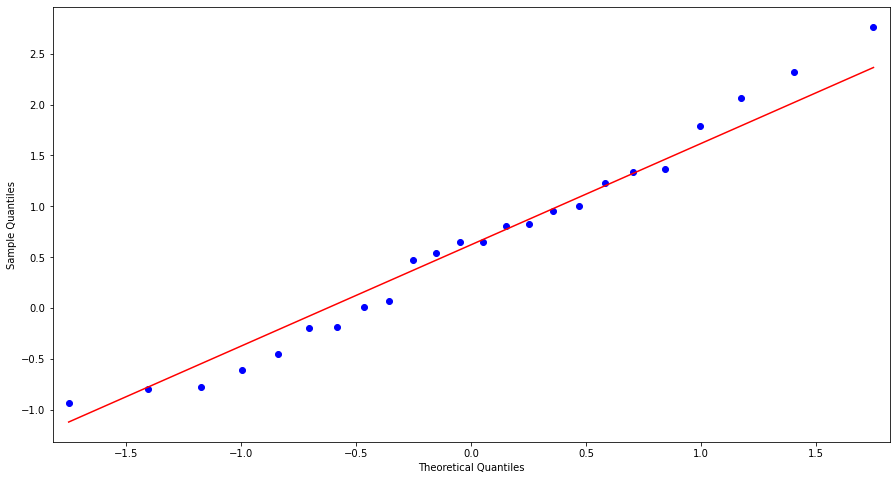

In [49]:
qqplot(residuals,line="s");

In [50]:
from sklearn.metrics import  mean_squared_error
rmse = mean_squared_error(test['CO2 ppm'],predict_fc['CO2 ppm_forecast'], squared=False)
print(rmse)

1.1732581812598561


In [51]:
def MAPE(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100

In [52]:
mape=MAPE(test['CO2 ppm'].values,predict_fc['CO2 ppm_forecast'].values)
print(mape)

0.2806561850017469


## SARIMA Model

### we will find the model parameters based on AIC criteria. Parameters will be  generated using combination for the given range.

In [53]:
import itertools
p = q = range(0, 4)
d= range(1,2)
pdq = list(itertools.product(p, d, q))

model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Model...')
print('Model: {}{}'.format(pdq[1], model_pdq[1]))
print('Model: {}{}'.format(pdq[1], model_pdq[2]))
print('Model: {}{}'.format(pdq[2], model_pdq[3]))
print('Model: {}{}'.format(pdq[2], model_pdq[4]))

Examples of parameter combinations for Model...
Model: (0, 1, 1)(0, 1, 1, 12)
Model: (0, 1, 1)(0, 1, 2, 12)
Model: (0, 1, 2)(0, 1, 3, 12)
Model: (0, 1, 2)(1, 1, 0, 12)


In [54]:
pdq

[(0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (3, 1, 0),
 (3, 1, 1),
 (3, 1, 2),
 (3, 1, 3)]

In [55]:
model_pdq

[(0, 1, 0, 12),
 (0, 1, 1, 12),
 (0, 1, 2, 12),
 (0, 1, 3, 12),
 (1, 1, 0, 12),
 (1, 1, 1, 12),
 (1, 1, 2, 12),
 (1, 1, 3, 12),
 (2, 1, 0, 12),
 (2, 1, 1, 12),
 (2, 1, 2, 12),
 (2, 1, 3, 12),
 (3, 1, 0, 12),
 (3, 1, 1, 12),
 (3, 1, 2, 12),
 (3, 1, 3, 12)]

### Creating an empty Dataframe with column names only where the model and AIC scores will be saved

In [56]:
dfObj2 = pd.DataFrame(columns=['param','seasonal', 'AIC'])
dfObj2

,param,seasonal,AIC


In [57]:
import statsmodels.api as sm
for param in pdq:
    for param_seasonal in model_pdq:
        mod = SARIMAX(train,
                      order=param,
                      seasonal_order=param_seasonal,
                      enforce_stationarity=False,
                      enforce_invertibility=False)
            
        results_SARIMA = mod.fit()
        print('SARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        dfObj2 = dfObj2.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:169.5026390080524
SARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:76.60024513106538
SARIMA(0, 1, 0)x(0, 1, 2, 12)12 - AIC:63.66861066172926
SARIMA(0, 1, 0)x(0, 1, 3, 12)12 - AIC:59.673449475408994
SARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:101.77574384550147
SARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:73.06883156314025
SARIMA(0, 1, 0)x(1, 1, 2, 12)12 - AIC:63.3937682537271
SARIMA(0, 1, 0)x(1, 1, 3, 12)12 - AIC:58.764870033627346
SARIMA(0, 1, 0)x(2, 1, 0, 12)12 - AIC:78.32111628951127
SARIMA(0, 1, 0)x(2, 1, 1, 12)12 - AIC:64.7713520537352
SARIMA(0, 1, 0)x(2, 1, 2, 12)12 - AIC:64.2491614576889
SARIMA(0, 1, 0)x(2, 1, 3, 12)12 - AIC:56.79284265275189
SARIMA(0, 1, 0)x(3, 1, 0, 12)12 - AIC:66.92500496348913
SARIMA(0, 1, 0)x(3, 1, 1, 12)12 - AIC:66.44704236099463
SARIMA(0, 1, 0)x(3, 1, 2, 12)12 - AIC:65.39834359507716
SARIMA(0, 1, 0)x(3, 1, 3, 12)12 - AIC:59.37199089052895
SARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:165.13652038660632
SARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:66.292506

SARIMA(2, 1, 1)x(0, 1, 3, 12)12 - AIC:57.14464793374374
SARIMA(2, 1, 1)x(1, 1, 0, 12)12 - AIC:95.69274554310151
SARIMA(2, 1, 1)x(1, 1, 1, 12)12 - AIC:68.58503083757529
SARIMA(2, 1, 1)x(1, 1, 2, 12)12 - AIC:74.68820960230065
SARIMA(2, 1, 1)x(1, 1, 3, 12)12 - AIC:55.568689859532945
SARIMA(2, 1, 1)x(2, 1, 0, 12)12 - AIC:80.73953855299169
SARIMA(2, 1, 1)x(2, 1, 1, 12)12 - AIC:72.37659853691183
SARIMA(2, 1, 1)x(2, 1, 2, 12)12 - AIC:78.60643933517157
SARIMA(2, 1, 1)x(2, 1, 3, 12)12 - AIC:62.285216907567595
SARIMA(2, 1, 1)x(3, 1, 0, 12)12 - AIC:63.23441278164213
SARIMA(2, 1, 1)x(3, 1, 1, 12)12 - AIC:62.88242502761489
SARIMA(2, 1, 1)x(3, 1, 2, 12)12 - AIC:61.1954168035539
SARIMA(2, 1, 1)x(3, 1, 3, 12)12 - AIC:56.83488499170878
SARIMA(2, 1, 2)x(0, 1, 0, 12)12 - AIC:161.39936365747053
SARIMA(2, 1, 2)x(0, 1, 1, 12)12 - AIC:69.82170512506086
SARIMA(2, 1, 2)x(0, 1, 2, 12)12 - AIC:65.89363703596048
SARIMA(2, 1, 2)x(0, 1, 3, 12)12 - AIC:56.47433063352652
SARIMA(2, 1, 2)x(1, 1, 0, 12)12 - AIC:95.99223

### sorting parameters for best AIC score

In [58]:
dfObj2.sort_values(by=['AIC'])

,param,seasonal,AIC
187,"(2, 1, 3)","(2, 1, 3, 12)",43.280975
43,"(0, 1, 2)","(2, 1, 3, 12)",45.015806
247,"(3, 1, 3)","(1, 1, 3, 12)",45.740009
251,"(3, 1, 3)","(2, 1, 3, 12)",45.930607
139,"(2, 1, 0)","(2, 1, 3, 12)",46.035443
...,...,...,...
32,"(0, 1, 2)","(0, 1, 0, 12)",165.522024
144,"(2, 1, 1)","(0, 1, 0, 12)",165.632730
64,"(1, 1, 0)","(0, 1, 0, 12)",166.711967
128,"(2, 1, 0)","(0, 1, 0, 12)",167.606179


In [59]:
model = sm.tsa.statespace.SARIMAX(train,
                                order=(2,1,3),
                                seasonal_order=(2,1,3,12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
model_Sarima = model.fit()
print(model_Sarima.summary())

                                     SARIMAX Results                                      
Dep. Variable:                            CO2 ppm   No. Observations:                  168
Model:             SARIMAX(2, 1, 3)x(2, 1, 3, 12)   Log Likelihood                 -10.640
Date:                            Fri, 24 Sep 2021   AIC                             43.281
Time:                                    12:23:44   BIC                             73.475
Sample:                                01-01-1965   HQIC                            55.537
                                     - 12-01-1978                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3948      0.062      6.375      0.000       0.273       0.516
ar.L2         -0.8963      0.066   

In [60]:
SARIMA_predictions=model_Sarima.forecast(steps=24)#(start=pred_start, end=pred_end)

In [61]:
SARIMA_predictions

1979-01-01    335.863790
1979-02-01    336.580773
1979-03-01    337.426554
1979-04-01    338.644920
1979-05-01    339.203655
1979-06-01    338.742096
1979-07-01    337.471886
1979-08-01    335.484626
1979-09-01    333.914384
1979-10-01    333.683436
1979-11-01    334.942995
1979-12-01    336.120544
1980-01-01    337.121617
1980-02-01    337.818986
1980-03-01    338.722025
1980-04-01    339.902795
1980-05-01    340.414754
1980-06-01    339.993844
1980-07-01    338.739052
1980-08-01    336.865531
1980-09-01    335.161669
1980-10-01    334.988682
1980-11-01    336.160002
1980-12-01    337.352006
Freq: MS, Name: predicted_mean, dtype: float64

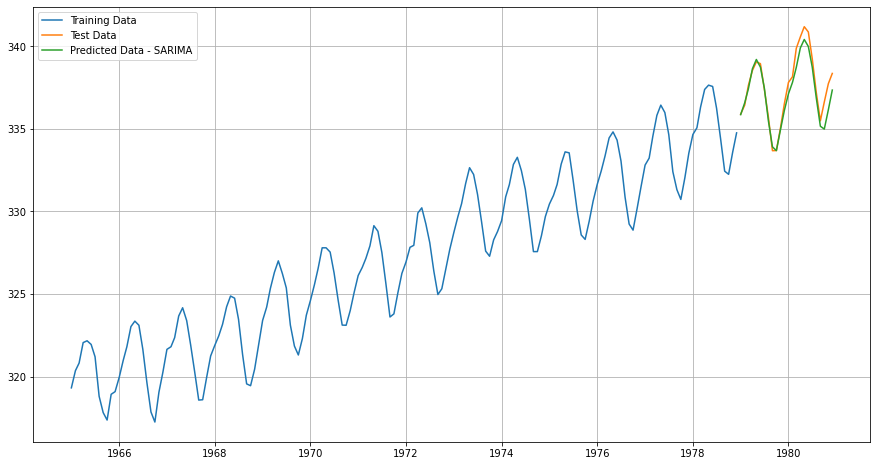

In [62]:
plt.plot(train,label='Training Data')
plt.plot(test,label='Test Data')
plt.plot(test.index,SARIMA_predictions,label='Predicted Data - SARIMA')
plt.legend(loc='best')
plt.grid();

### finding RSMA and MAPE

In [63]:
from sklearn.metrics import  mean_squared_error
rmse = mean_squared_error(test['CO2 ppm'],SARIMA_predictions, squared=False)
print(rmse)

0.6723986021015218


In [64]:
mape = MAPE(test['CO2 ppm'],SARIMA_predictions)
print(mape)

0.14497397719818242


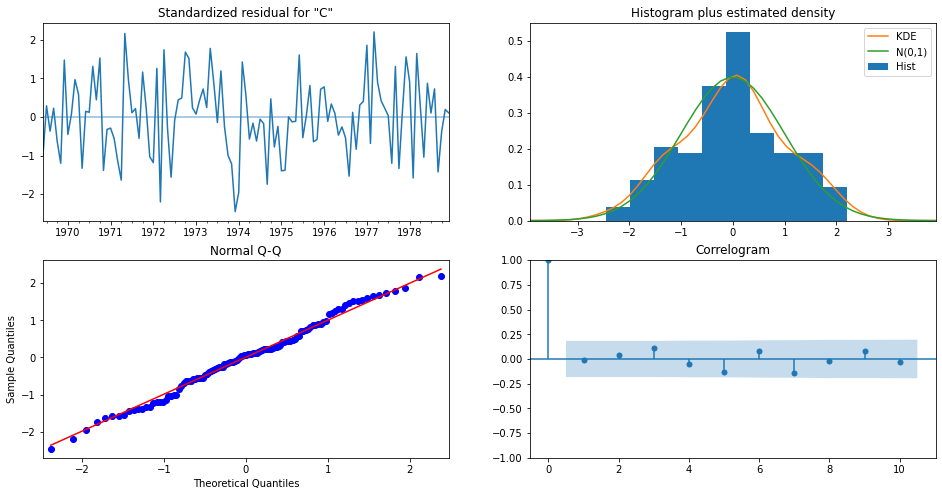

In [65]:
model_Sarima.plot_diagnostics(figsize=(16, 8))
plt.show()

## fitting model on whole data

In [66]:
model = sm.tsa.statespace.SARIMAX(df,
                                order=(2,1,3),
                                seasonal_order=(2,1,3,12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
model_Sarima = model.fit()
print(model_Sarima.summary())

                                     SARIMAX Results                                      
Dep. Variable:                            CO2 ppm   No. Observations:                  192
Model:             SARIMAX(2, 1, 3)x(2, 1, 3, 12)   Log Likelihood                 -26.787
Date:                            Fri, 24 Sep 2021   AIC                             75.574
Time:                                    12:23:52   BIC                            107.853
Sample:                                01-01-1965   HQIC                            88.692
                                     - 12-01-1980                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3642      0.086      4.243      0.000       0.196       0.532
ar.L2         -0.8569      0.062   

# Forecast with confidence interval

In [67]:
forecast = model_Sarima.forecast(steps=24)

In [68]:
forecast

1981-01-01    339.499104
1981-02-01    339.978256
1981-03-01    341.173508
1981-04-01    342.399105
1981-05-01    342.949041
1981-06-01    342.382206
1981-07-01    340.947933
1981-08-01    339.143735
1981-09-01    337.553787
1981-10-01    337.604288
1981-11-01    338.712106
1981-12-01    339.885175
1982-01-01    341.048760
1982-02-01    341.630226
1982-03-01    342.629648
1982-04-01    343.722659
1982-05-01    344.331714
1982-06-01    343.938897
1982-07-01    342.523181
1982-08-01    340.545895
1982-09-01    338.931789
1982-10-01    339.090903
1982-11-01    340.260746
1982-12-01    341.286268
Freq: MS, Name: predicted_mean, dtype: float64

In [69]:
pred95 = model_Sarima.get_forecast(steps=24,alpha=0.05)

In [70]:
pred95=pred95.conf_int()

In [71]:
pred95

,lower CO2 ppm,upper CO2 ppm
1981-01-01,338.940754,340.057454
1981-02-01,339.304571,340.651942
1981-03-01,340.367168,341.979848
1981-04-01,341.511212,343.286998
1981-05-01,342.015411,343.882672
1981-06-01,341.395407,343.369005
1981-07-01,339.882353,342.013513
1981-08-01,338.003592,340.283878
1981-09-01,336.365098,338.742476
1981-10-01,336.376369,338.832207


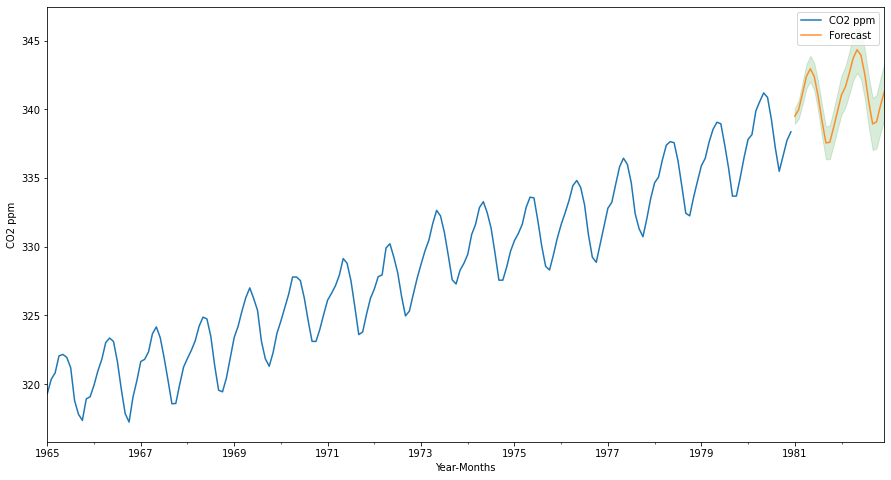

In [72]:
axis = df.plot(label='Observed', figsize=(15, 8))
forecast.plot(ax=axis, label='Forecast', alpha=0.85)
axis.fill_between(forecast.index, pred95['lower CO2 ppm'], pred95['upper CO2 ppm'], color='g', alpha=0.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('CO2 ppm')
plt.legend(loc='best')
plt.show()

# END